# Multi-Arm Bandit Algorithm : Epsilon-Decay

In [1]:
import pandas as pd 
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

## Example : Guassian Reward 

In [2]:
def run_experiment(number_of_bandit, q_true, eps, beta, number_of_run, number_of_time_step):
    
    sum_of_rewards        = np.zeros( number_of_time_step )
    sum_of_regrets        = np.zeros( number_of_time_step )
    count_of_actions      = np.zeros( (number_of_time_step, number_of_bandit) )
    count_of_best_actions = np.zeros( number_of_time_step )
    
    q_star = np.random.choice( np.where(q_true == q_true.max())[0] )
    
    for r in range(number_of_run):          
        N_act = np.zeros( number_of_bandit )
        Q_act = np.zeros( number_of_bandit )
    
        list_of_actions = []
        list_of_rewards = []
        list_of_regrets = []
        list_of_best_actions = np.zeros( number_of_time_step )

        for t in range(number_of_time_step):
            """Step 1: Choose an action"""
            rand_prob = np.random.random()
            
            if beta == 0:
                eps = eps
            else:
                eps = 1.0/(1.0+ (t+1)*beta)
            
            if rand_prob < eps:
                """pick one of the slot machines randomly"""
                A = np.random.choice(number_of_bandit)
            else:
                """pick the slot machine that has the highest expected reward"""
                #A = np.argmax( Q_act )
                
                #Q_max = Q_act.max()
                #A = np.random.choice(np.flatnonzero(Q_act == Q_max)) 
                
                Q_max = Q_act.max()
                A = np.random.choice(np.where(Q_act == Q_max)[0])

            """Step 2: Get a reward corresponding to that action"""
            reward = np.random.normal(q_true[A],1)

            """Step 3: Update N and Q"""
            N_act[A] += 1
            Q_act[A] += (reward - Q_act[A])/N_act[A]
            
            """Step 4: Collect actions, rewards, and regrets"""
            list_of_actions.append(A)
            list_of_rewards.append(reward)
            
            regret = q_star - q_true[A]
            list_of_regrets.append(regret)
            
            if A == np.argmax(q_true):
                list_of_best_actions[t] += 1
            
        sum_of_rewards += np.array(list_of_rewards)
        sum_of_regrets += np.array(list_of_regrets)
        count_of_best_actions += np.array( list_of_best_actions )
        
        for step, arm in enumerate(list_of_actions):
            count_of_actions[step][arm] += 1
            
    average_reward         = sum_of_rewards /np.float(number_of_run)
    average_regret         = sum_of_regrets /np.float(number_of_run)
    percent_of_best_action = count_of_best_actions /np.float(number_of_run)
    
    return average_reward, average_regret, percent_of_best_action, count_of_actions

In [3]:
rg = np.random.default_rng()

number_of_bandit = 10
number_of_run = 5000
number_of_time_step = 1000

q_true = rg.normal(0, 1, number_of_bandit)

average_reward_01_00, average_regret_01_00, best_action_01_00, _ = run_experiment(number_of_bandit, q_true, 0.1, 0.00, number_of_run, number_of_time_step)
average_reward_10_02, average_regret_10_02, best_action_10_02, _ = run_experiment(number_of_bandit, q_true, 1.0, 0.10, number_of_run, number_of_time_step)

(array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25]),
 <a list of 10 Text major ticklabel objects>)

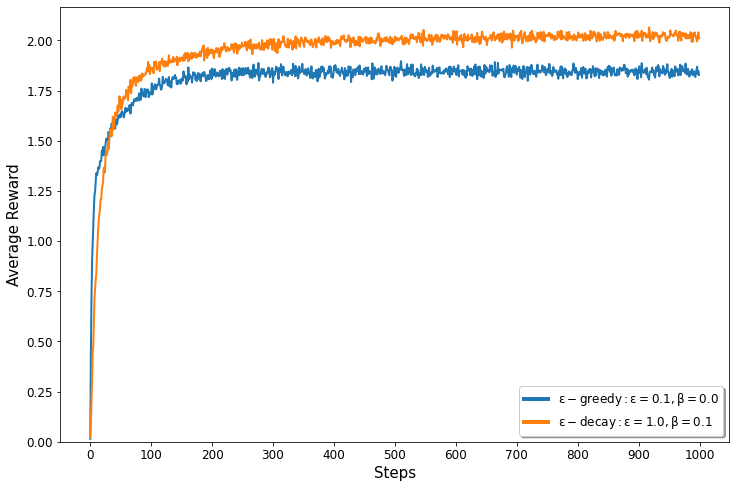

In [4]:
# Plot reward results
plt.figure(figsize = (12, 8)) 
plt.plot(average_reward_01_00, linewidth=2, label = r'$\mathrm{\epsilon-greedy : \epsilon}=0.1,  \mathrm{\beta}=0.0$') 
plt.plot(average_reward_10_02, linewidth=2, label = r'$\mathrm{\epsilon-decay  : \epsilon}=1.0,  \mathrm{\beta}=0.1$') 
plt.xlabel("Steps", fontsize=15)
plt.ylabel("Average Reward", fontsize=15)
legend = plt.legend(loc='lower right', fontsize=12, shadow=True)
for leg in legend.legendHandles:
    leg.set_linewidth(4)
#plt.xlim([-25, number_of_time_step])
plt.ylim(ymin=0)
plt.xticks(np.arange(0,1100,100), fontsize=12)
plt.yticks(fontsize=12)

(array([1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  , 3.25]),
 <a list of 10 Text major ticklabel objects>)

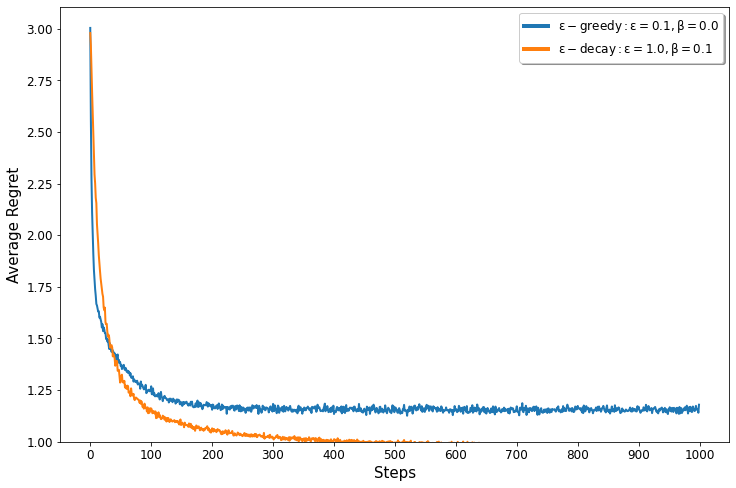

In [5]:
# Plot regret results
plt.figure(figsize = (12, 8)) 
plt.plot(average_regret_01_00, linewidth=2, label = r'$\mathrm{\epsilon-greedy : \epsilon}=0.1,  \mathrm{\beta}=0.0$') 
plt.plot(average_regret_10_02, linewidth=2, label = r'$\mathrm{\epsilon-decay  : \epsilon}=1.0,  \mathrm{\beta}=0.1$')

plt.xlabel("Steps", fontsize=15)
plt.ylabel("Average Regret", fontsize=15)
legend = plt.legend(loc='upper right', fontsize=12, shadow=True)
for leg in legend.legendHandles:
    leg.set_linewidth(4)
#plt.xlim([-25, number_of_time_step])
plt.ylim(ymin=1)
plt.xticks(np.arange(0,1100,100), fontsize=12)
plt.yticks(fontsize=12)

([<matplotlib.axis.YTick at 0x16f905c1760>,
 <a list of 11 Text major ticklabel objects>)

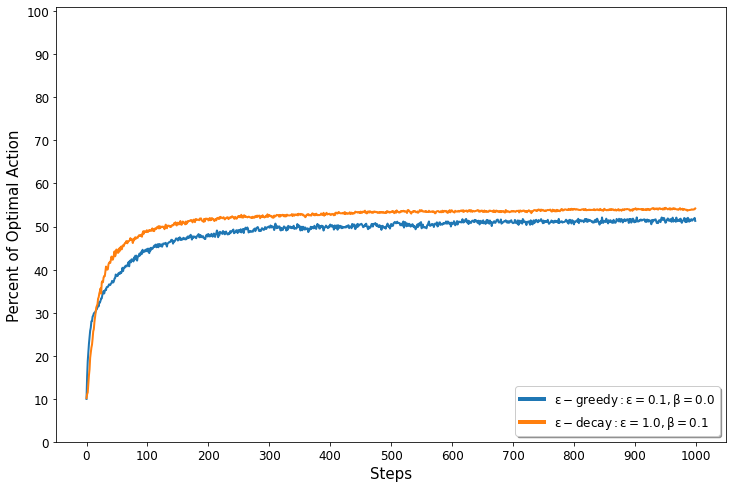

In [6]:
# Plot action results
plt.figure(figsize = (12, 8)) 
plt.plot(100*best_action_01_00, linewidth=2, label = r'$\mathrm{\epsilon-greedy : \epsilon}=0.1,  \mathrm{\beta}=0.0$')  
plt.plot(100*best_action_10_02, linewidth=2, label = r'$\mathrm{\epsilon-decay  : \epsilon}=1.0,  \mathrm{\beta}=0.1$') 
plt.xlabel("Steps", fontsize=15)
plt.ylabel("Percent of Optimal Action", fontsize=15)
plt.legend() 
legend = plt.legend(loc='lower right', fontsize=12, shadow=True)
for leg in legend.legendHandles:
    leg.set_linewidth(4)
#plt.xlim([-1, number_of_time_step])
plt.ylim(ymin=0, ymax=101)
plt.xticks(np.arange(0,1100,100), fontsize=12)
plt.yticks(np.arange(0,101,10), fontsize=12)

In [7]:
del run_experiment

## Example : Bernoulli Reward

In [8]:
def run_experiment(number_of_bandit, q_true, eps, beta, number_of_run, number_of_time_step):
    
    sum_of_rewards        = np.zeros( number_of_time_step )
    sum_of_regrets        = np.zeros( number_of_time_step )
    count_of_actions      = np.zeros( (number_of_time_step, number_of_bandit) )
    count_of_best_actions = np.zeros( number_of_time_step )
    
    q_star = np.random.choice( np.where(q_true == q_true.max())[0] )
    
    for r in range(number_of_run):    
        N_act = np.zeros( number_of_bandit )
        Q_act = np.zeros( number_of_bandit )
    
        list_of_actions = []
        list_of_rewards = []
        list_of_regrets = []
        list_of_best_actions = np.zeros( number_of_time_step )

        for t in range(number_of_time_step):
            """Step 1: Choose an action"""
            rand_prob = np.random.random()
            
            if beta == 0:
                eps = eps
            else:
                eps = 1.0/(1.0+ (t+1)*beta)
            
            if rand_prob < eps:
                """pick one of the slot machines randomly"""
                A = np.random.choice(number_of_bandit)
            else:
                """pick the slot machine that has the highest expected reward"""
                #A = np.argmax( Q_act )
                
                #Q_max = Q_act.max()
                #A = np.random.choice(np.flatnonzero(Q_act == Q_max)) 
                
                Q_max = Q_act.max()
                A = np.random.choice(np.where(Q_act == Q_max)[0])

            """Step 2: Get a reward corresponding to that action"""
            #if np.random.random() <= q_true[A]:
            #    reward = 1
            #else:
            #    reward = 0
            reward = np.random.binomial(n=1, p=q_true[A], size=1)[0]

            """Step 3: Update N and Q"""
            N_act[A] += 1
            Q_act[A] += (reward - Q_act[A])/N_act[A]

            """Step 4: Collect actions, rewards, and regrets"""
            list_of_actions.append(A)
            list_of_rewards.append(reward)
            
            regret = q_star - q_true[A]
            list_of_regrets.append(regret)
            
            if A == np.argmax(q_true):
                list_of_best_actions[t] += 1
            
        sum_of_rewards += np.array(list_of_rewards)
        sum_of_regrets += np.array(list_of_regrets)
        count_of_best_actions += np.array( list_of_best_actions )
        
        for step, arm in enumerate(list_of_actions):
            count_of_actions[step][arm] += 1
            
    average_reward         = sum_of_rewards /np.float(number_of_run)
    average_regret         = sum_of_regrets /np.float(number_of_run)
    percent_of_best_action = count_of_best_actions /np.float(number_of_run)
    
    return average_reward, average_regret, percent_of_best_action, count_of_actions

In [9]:
rg = np.random.default_rng()

number_of_bandit = 10
number_of_run = 5000
number_of_time_step = 1000

q_true = rg.uniform(0.1, 0.7, number_of_bandit)

average_reward_01_00, average_regret_01_00, best_action_01_00, _ = run_experiment(number_of_bandit, q_true, 0.1, 0.00, number_of_run, number_of_time_step)
average_reward_10_02, average_regret_10_02, best_action_10_02, _ = run_experiment(number_of_bandit, q_true, 1.0, 0.10, number_of_run, number_of_time_step)

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]),
 <a list of 8 Text major ticklabel objects>)

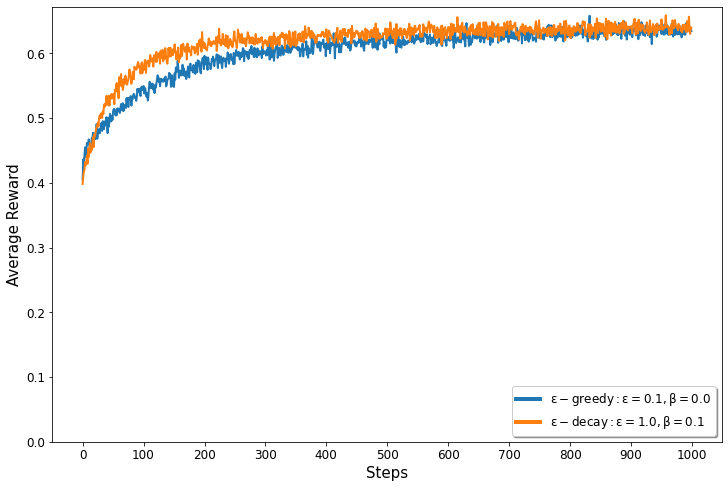

In [10]:
# Plot reward results
plt.figure(figsize = (12, 8)) 
plt.plot(average_reward_01_00, linewidth=2, label = r'$\mathrm{\epsilon-greedy : \epsilon}=0.1,  \mathrm{\beta}=0.0$') 
plt.plot(average_reward_10_02, linewidth=2, label = r'$\mathrm{\epsilon-decay  : \epsilon}=1.0,  \mathrm{\beta}=0.1$') 
plt.xlabel("Steps", fontsize=15)
plt.ylabel("Average Reward", fontsize=15)
legend = plt.legend(loc='lower right', fontsize=12, shadow=True)
for leg in legend.legendHandles:
    leg.set_linewidth(4)
#plt.xlim([-25, number_of_time_step])
plt.ylim(ymin=0)
plt.xticks(np.arange(0,1100,100), fontsize=12)
plt.yticks(fontsize=12)

(array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7]),
 <a list of 8 Text major ticklabel objects>)

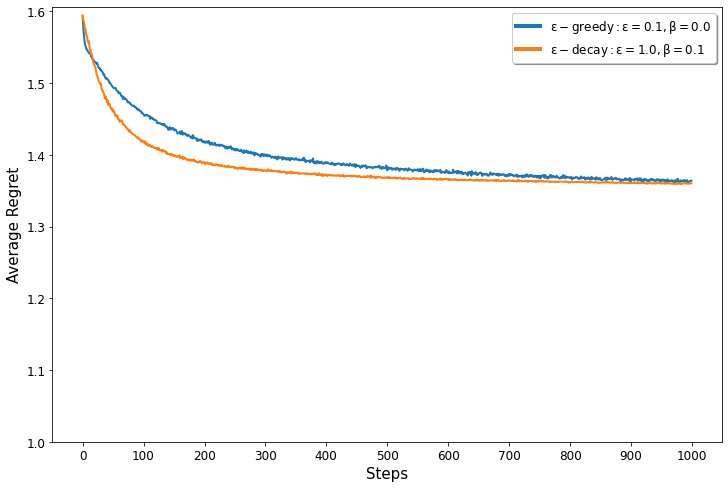

In [11]:
# Plot regret results
plt.figure(figsize = (12, 8)) 
plt.plot(average_regret_01_00, linewidth=2, label = r'$\mathrm{\epsilon-greedy : \epsilon}=0.1,  \mathrm{\beta}=0.0$') 
plt.plot(average_regret_10_02, linewidth=2, label = r'$\mathrm{\epsilon-decay  : \epsilon}=1.0,  \mathrm{\beta}=0.1$')

plt.xlabel("Steps", fontsize=15)
plt.ylabel("Average Regret", fontsize=15)
legend = plt.legend(loc='upper right', fontsize=12, shadow=True)
for leg in legend.legendHandles:
    leg.set_linewidth(4)
#plt.xlim([-25, number_of_time_step])
plt.ylim(ymin=1)
plt.xticks(np.arange(0,1100,100), fontsize=12)
plt.yticks(fontsize=12)

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.]),
 <a list of 10 Text major ticklabel objects>)

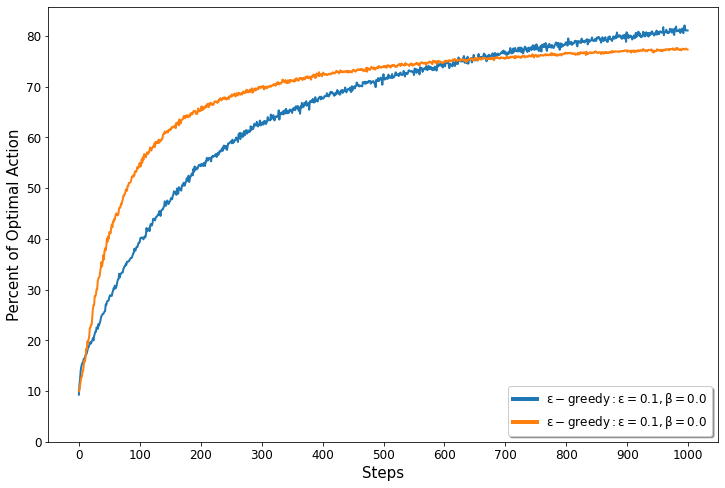

In [12]:
# Plot action results
plt.figure(figsize = (12, 8)) 
plt.plot(100*best_action_01_00, linewidth=2, label = r'$\mathrm{\epsilon-greedy : \epsilon}=0.1,  \mathrm{\beta}=0.0$') 
plt.plot(100*best_action_10_02, linewidth=2, label = r'$\mathrm{\epsilon-greedy : \epsilon}=0.1,  \mathrm{\beta}=0.0$')
plt.xlabel("Steps", fontsize=15)
plt.ylabel("Percent of Optimal Action", fontsize=15)
plt.legend() 
legend = plt.legend(loc='lower right', fontsize=12, shadow=True)
for leg in legend.legendHandles:
    leg.set_linewidth(4)
#plt.xlim([-1, number_of_time_step])
plt.ylim(ymin=0)
plt.xticks(np.arange(0,1100,100), fontsize=12)
plt.yticks(fontsize=12)